# <center> Самостоятельная работа по Визуализация данных

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [12]:
import pandas as pd
import plotly
import plotly.express as px
print(plotly.__version__)
churn_data = pd.read_csv('data/churn.csv')

# Создаю колонку с более наглядным отображением статуса клиента - остался или ушел
churn_data['status_client'] = churn_data['Exited'].apply(lambda x: 'Lost' if x == 1 else 'Valid')
# Создаю дополнительную колонку для более удобного подсчета строк
churn_data['count_client'] = 1
 
df = churn_data.groupby('count_client', as_index=False).count()
df = churn_data
fig = px.pie(df,
             values='count_client',
             names='status_client',
             title='Соотношение количества действующих и потерянных клиентов',
             height=500, #высота
            width=700, #ширина
            )
fig.show()

6.3.0


In [13]:
#считаем количество действующих и ушедших клиентов
bar_data = churn_data.groupby(
    by='status_client',
    as_index=False
)['count_client'].count()

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="status_client", #ось x
    y="count_client", #ось y
    color='status_client', #расцветка в зависимости от статуса
    text = 'count_client', #текст на столбцах - количество клиентов
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Соотношение дйствующих и ушедших клиентов' #заголовок
)

#отображаем его
fig.show()

Вывод: Анализируя графики можно сдлеать заключение, что ушло меньшее количетсво (20,4%) от общего числа клиентов. Пока ещё есть с кем работать.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [14]:
# Создаю категорийный признак клиента - целое число, кратное сумме счета деленной на 20 000$
churn_data['class_client'] = churn_data['Balance'].apply(lambda x: int(((x+20000)/20000)) if x > 2500 else 0)

display(churn_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,status_client,count_client,class_client
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Lost,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Valid,1,5
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Lost,1,8
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Valid,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Valid,1,7


In [15]:
#считаем количество клиентов по классам
bar_data = churn_data.groupby(
    by='class_client',
    as_index=False
)['count_client'].count().nlargest(20, columns=['count_client'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="class_client", #ось x
    y="count_client", #ось y
    color='class_client', #расцветка в зависимости от статуса
    text = 'count_client', #текст на столбцах - количество клиентов
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    
    title='Распределение количества клиентов по сумме счета', #заголовок,
    subtitle='По оси х - класс клиента = n X 20 000$' #подзаголовок
)

#отображаем его
fig.show()

Вывод:
Судя по графику можно заключить что: 
1)большое количество клиентов имеют накопления до 2500$ 
2)клиенты с деньгами имеют накопления в дипазоне от 40 000$ до 200 000$

In [16]:
#считаем балансы по классам клиентов
bar_data = churn_data.groupby(
    by='class_client',
    as_index=False
)['Balance'].sum().nlargest(20, columns=['Balance'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="class_client", #ось x
    y="Balance", #ось y
    color='class_client', #расцветка в зависимости от статуса
    text = 'Balance', #текст на столбцах - сумма балансов
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    
    title='Распределение баланса клиентов по сумме счета', #заголовок,
    subtitle='По оси Х - класс клиента = n X 20 000$' #подзаголовок
)

#отображаем его
fig.show()

Вывод:
По графику можно сделать вывод, что больше всего денег приносят в банк клиенты, у которых на счетах от 100 000$  до 180 000$

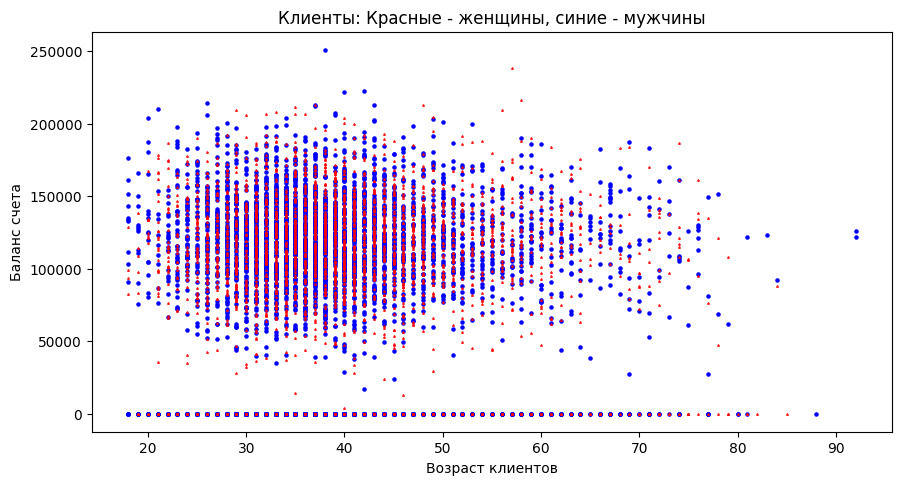

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
plt.xlabel('Возраст клиентов')
plt.ylabel('Баланс счета')
plt.title('Клиенты: Красные - женщины, синие - мужчины')
axes.scatter(
    x=churn_data[churn_data['Gender']=='Male']['Age'], 
    y=churn_data[churn_data['Gender']=='Male']['Balance'], 
    s=5,
    marker='o',
    c = 'blue'
);
axes.scatter(
    x=churn_data[churn_data['Gender']=='Female']['Age'], 
    y=churn_data[churn_data['Gender']=='Female']['Balance'], 
    s=1,
    marker='^',
    c = 'red'
);


Вывод:
По графику можно сделать вывод, что возраст клиентов, с большим числом счетов находятся в дипазоне озраста от 25 до 50 лет. При этом зависимости от пола нет.

In [18]:


#строим график
fig = px.scatter_3d(
    data_frame=churn_data, #DataFrame
    x = 'EstimatedSalary', #ось абсцисс
    y = 'Age', #ось ординат
    z = 'Balance', #ось аппликат
    color='Exited', #расцветка в зависимости от ушли/остались
    log_x=True, 
    log_y=True,
    width=1000,
    height=700
)

#отображаем график
fig.show()

Вывод: основная масса ушедших клиентов (желтые точки) концентрируется в диапазоне 45-60 лет

9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока. 
Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.


In [19]:
df = churn_data.groupby('Balance', as_index=False).count()
df = churn_data
fig = px.pie(df,
             values='Balance',
             names='status_client',
             title='Соотношение сумм на счетах действующих и потерянных клиентов',
             height=500, #высота
            width=700, #ширина
            )
fig.show()

Вывод:
Из графика следует что ушедшие клиенты имели в 4 раза меньше денег в среднем, чем действующие. Из чего можно сделать вывод что действующие в банке продукты не учитывают интересы клиентов с небольшим количеством денег.

In [20]:
import numpy as np
bar_data = churn_data.pivot_table(values='Balance', 
                                  index='class_client',
                                  columns='status_client',
                                  aggfunc='sum',
                                  fill_value=0 ).reset_index()#.unstack().transpose()

melted_data = bar_data.melt(
    id_vars='class_client',
    var_name='status_client',
    value_name='sum'
)
# счтаем отношение ушедших клиентов к оставшимся
bar_data['lost_valid_rate'] = bar_data['Lost'] / bar_data['Valid']
bar_data = bar_data.replace([np.inf, -np.inf], np.nan)
bar_data['lost_valid_rate'] = bar_data['lost_valid_rate'].fillna(0)
display(bar_data)

status_client,class_client,Lost,Valid,lost_valid_rate
0,0,0.00,0.000000e+00,0.000000
1,1,16227.88,3.115639e+04,0.520852
2,2,280803.52,5.600900e+05,0.501354
3,3,1678396.28,4.869953e+06,0.344643
4,4,6052128.35,2.482820e+07,0.243760
5,5,18070847.60,7.312623e+07,0.247119
6,6,49405694.24,1.289844e+08,0.383036
7,7,52766815.38,1.585948e+08,0.332715
8,8,32401400.00,1.111881e+08,0.291411
9,9,14888302.59,5.637012e+07,0.264117


In [21]:
#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="class_client", #ось x
    y="lost_valid_rate", #ось y
    #color='status_client', #расцветка в зависимости от статуса
    #text = 'Balance', #текст на столбцах - количество клиентов
    orientation='v', #ориентация графика
    #barmode='group',
    height=500, #высота
    width=1000, #ширина
    
    title='Отношение ушедших денег к оставшимся по классам', #заголовок,
    subtitle='по оси х - Класс клиента = n X 20 000$' #заголовок
)

#отображаем его
fig.show()

Вывод:
Из графика видно, что денег больше ушло чем осталось в сегменте суммы счета 220 000$ и 240 000$, и сильно уходят клиенты с балансами до 40 000$ и отток наблюдается в сегменте 120 000$ 

In [29]:

#строим график
fig = px.bar(
    data_frame=melted_data, #датафрейм
    x="class_client", #ось x
    y="sum", #ось y
    color='status_client', #расцветка в зависимости от статуса - ушел/остался
    orientation='v', #ориентация графика
    #barmode='group',
    height=500, #высота
    width=1000, #ширина
    
    title='Распределение оставшихся и ушедших клиентов по сумме счета', #заголовок,
    subtitle='Класс клиента = n X 20 000$' #заголовок
)

#отображаем его
fig.show()

Вывод:
Из графика видно, что в абсолютных значениях больше всего ушло клиентов с суммой счета от 140 000$ до 160 000$ которые являются главным составляющим в балансе банка.

Учитывая 3 предыдущих графика можно предположить, что у банка плохие программы для держателей крупных сумм и не достаточно хорошие для мелких сумм.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

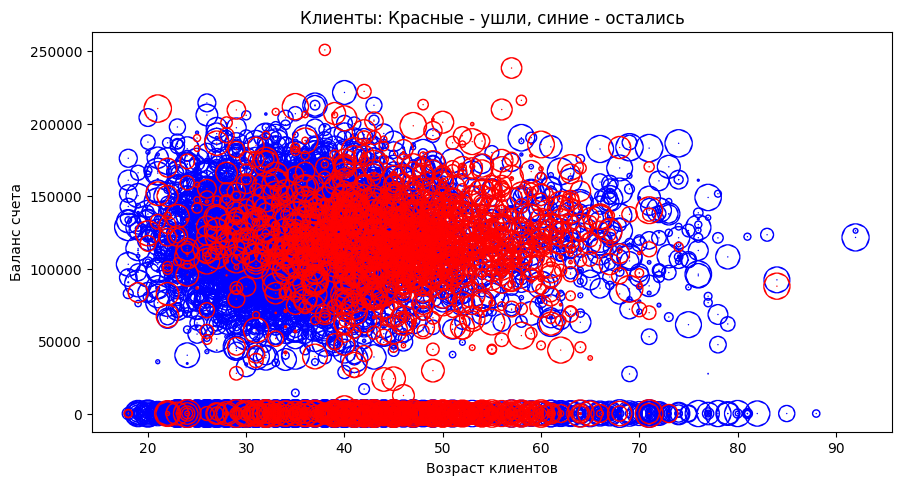

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
balance_data = churn_data[churn_data['Exited'] == 0]
no_balance_data = churn_data[churn_data['Exited'] == 1]

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
plt.xlabel('Возраст клиентов')
plt.ylabel('Баланс счета')
plt.title('Клиенты: Красные - ушли, синие - остались')
axes.scatter(
    x=balance_data['Age'], 
    y=balance_data['Balance'],
    linewidths=balance_data['EstimatedSalary']/10000,
    s=1,
    marker='o',
    c = 'blue',
);
axes.scatter(
    x=no_balance_data['Age'], 
    y=no_balance_data['Balance'],
    linewidths=no_balance_data['EstimatedSalary']/10000,
    s=1,
    marker='o',
    c = 'red',
);

Вывод: Судя по получившемуся графику можно предположить что отток клиентов происходит у клиентов 40-50 лет и на них стоит банку обратить внимание.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

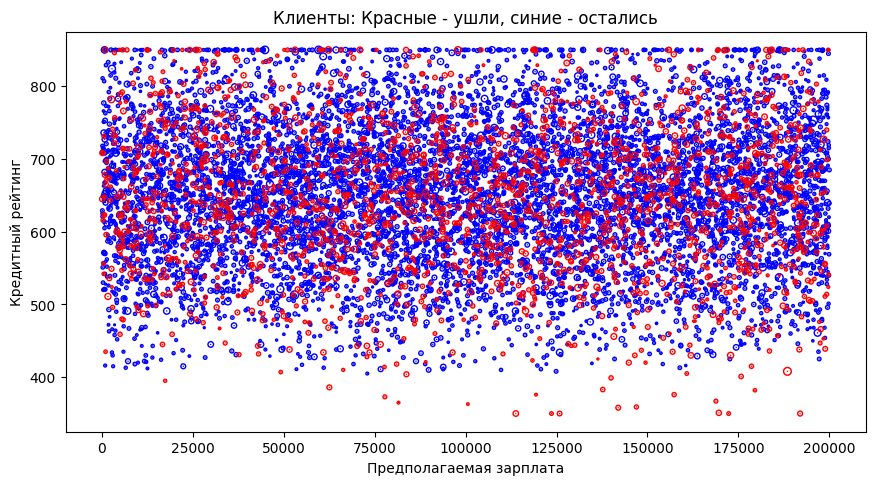

In [24]:
balance_data = churn_data[churn_data['Exited'] == 0]
no_balance_data = churn_data[churn_data['Exited'] == 1]

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
plt.xlabel('Предполагаемая зарплата')
plt.ylabel('Кредитный рейтинг')
plt.title('Клиенты: Красные - ушли, синие - остались')
axes.scatter(
    x=balance_data['EstimatedSalary'], 
    y=balance_data['CreditScore'],
    linewidths=balance_data['Age']/15,
    s=1,
    marker='o',
    c = 'blue',
);
axes.scatter(
    x=no_balance_data['EstimatedSalary'], 
    y=no_balance_data['CreditScore'],
    linewidths=no_balance_data['Age']/15,
    s=1,
    marker='o',
    c = 'red',
);

Вывод: Судя по графику нет взаимосвязи между кредитным рейтингом и предполагаемой зарплатой, а так же нет корелляции с ушедшими клиентами. Из данного графика видно что средний кредитный рейтинг располагается в дипапзоне от 550 до 800.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [25]:
df = churn_data[churn_data['Exited']==1].groupby('Gender', as_index=False).count()

fig = px.pie(df,
             values='count_client',
             names='Gender',
             title='Соотношение мужчин и женщин среди ушедших клиентов',
             height=500, #высота
            width=700, #ширина
            )
fig.show()

Вывод: Среди ушедших клиентов больше мужчин.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [31]:
bar_data = churn_data.pivot_table(values='count_client', 
                                  index='NumOfProducts',
                                  columns='status_client',
                                  aggfunc='count',
                                  fill_value=0 ).reset_index()#.unstack().transpose()
#bar_data = bar_data.drop('status_client', axis=1)
demelted_data = bar_data.melt(
    id_vars='NumOfProducts',
    var_name='status_client',
    value_name='count'
)


In [32]:
#строим график
fig = px.bar(
    data_frame=demelted_data, #датафрейм
    x="NumOfProducts", #ось x
    y="count", #ось y
    color='status_client', #расцветка в зависимости от статуса
    #text = 'Balance', #текст на столбцах - количество клиентов
    orientation='v', #ориентация графика
    barmode='group',
    height=500, #высота
    width=1000, #ширина
    
    title='Число клиентов в зависимости от кол-ва купленных услуг', #заголовок,
    
)

#отображаем его
fig.show()

Вывод: Судя по графику количество преобретенных услуг обратнопропорционально количеству ушедших клиентов. Поэтому можно предположить, что чем меньше усшуг клиент купил, тем больше шансов его потерять.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [ ]:
bar_data = churn_data.pivot_table(values='count_client', 
                                  index='IsActiveMember',
                                  columns='status_client',
                                  aggfunc='count',
                                  fill_value=0 ).reset_index()#.unstack().transpose()
#bar_data = bar_data.drop('status_client', axis=1)
demelted_data = bar_data.melt(
    id_vars='IsActiveMember',
    var_name='status_client',
    value_name='sum'
)

In [ ]:
#строим график
fig = px.bar(
    data_frame=demelted_data, #датафрейм
    x="IsActiveMember", #ось x
    y="sum", #ось y
    color='status_client', #расцветка в зависимости от статуса
    #text = 'Balance', #текст на столбцах - количество клиентов
    orientation='v', #ориентация графика
    barmode='group',
    height=500, #высота
    width=1000, #ширина
    
    title='Зависимость оттока клиентов от активности клиента', #заголовок,
    subtitle='' #заголовок
)

#отображаем его
fig.show()

Вывод: Число потерянных клиентов выше среди неактивных клиентов. Соответственно, можно порекомендовать банку переводить клиентов в активные, чтобы уменьшить отток клиентов.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
bar_data = churn_data.pivot_table(values='count_client', 
                                  index='Geography',
                                  columns='Exited',
                                  aggfunc='sum',
                                  fill_value=0 ).reset_index()#.unstack().transpose()
#bar_data = bar_data.drop('status_client', axis=1)
bar_data['lost_percent'] = bar_data[1] / bar_data[0]*100
demelted_data = bar_data.melt(
    id_vars='Geography',
    var_name='status_client',
    value_name='sum'
)
display(bar_data)

Exited,Geography,0,1,lost_percent
0,France,4204,810,19.267364
1,Germany,1695,814,48.023599
2,Spain,2064,413,20.009690


In [ ]:
#преобразуем даты в строковый формат
#demelted_data['status_client'] = demelted_data['status_client'].astype('string')


#строим график
fig = px.choropleth(
    data_frame=bar_data, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="lost_percent", #от чего зависит цвет
    #animation_frame="status_client", #анимационный бегунок
    range_color=[0, 100], #диапазон цвета
    title='Процент потеряных клиентов', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

C:\Users\deeba\AppData\Local\Temp\ipykernel_21588\1251336479.py:6: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



Вывод: доля потеряных клиентов выше всего в Германии

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [37]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)



In [38]:
#группируем данные по новому категориальному признаку 
bar_data = churn_data.groupby(
    by='CreditScoreCat',
    as_index=False
)['count_client'].count().nlargest(20, columns=['count_client'])
#[['recovered_rate']].mean().round(2).nlargest(10, columns=['recovered_rate'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="CreditScoreCat", #ось x
    y="count_client", #ось y
    text = 'count_client', #текст на столбцах - количество клиентов
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    
    title='Распределение количества клиентов по сумме счета', #заголовок,
    subtitle='Класс клиента = n X 20 000$' #заголовок
)

#отображаем его
fig.show()

In [39]:
bar_data = churn_data.pivot_table(values='count_client', 
                                  index='CreditScoreCat',
                                  columns='status_client',
                                  aggfunc='count',
                                  fill_value=0 ).reset_index()#.unstack().transpose()
#bar_data = bar_data.drop('status_client', axis=1)
demelted_data = bar_data.melt(
    id_vars='CreditScoreCat',
    var_name='status_client',
    value_name='sum'
)

In [40]:
#строим график
fig = px.bar(
    data_frame=demelted_data, #датафрейм
    x="CreditScoreCat", #ось x
    y="sum", #ось y
    color='status_client', #расцветка в зависимости от статуса
    #text = 'Balance', #текст на столбцах - количество клиентов
    orientation='v', #ориентация графика
    barmode='group',
    height=500, #высота
    width=1000, #ширина
    
    title='Классификация по кредитному рейтингу', #заголовок,
    subtitle='' #заголовок
)

#отображаем его
fig.show()

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [ ]:
hot_data = churn_data.pivot_table(values = 'Exited',
                                  index = 'CreditScoreCat',
                                  columns = 'Tenure',
                                  fill_value = 0,
                                  aggfunc= 'mean'
)
display(hot_data)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


0.13.2


Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


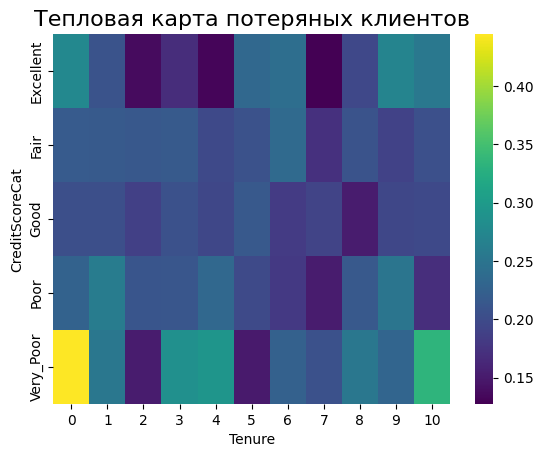

In [ ]:

import seaborn as sns
print(sns.__version__)

hot_data.columns = hot_data.columns.astype('string')
display(hot_data)

heatmap = sns.heatmap(data=hot_data, cmap='viridis')
heatmap.set_title('Тепловая карта потеряных клиентов', fontsize=16);

Вывод: категории клиентов, которые уходят чаще всего 'Very_Poor' и 'Excellent' 